<a href="https://colab.research.google.com/github/brianadam18/PCVK_Week3/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 3
# Nama : Brian Adam Bhagasara
# NIM  : 1941720190
# Kelas : TI-3G

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


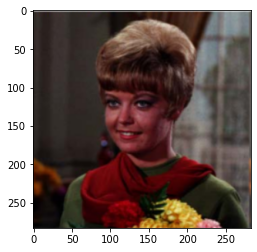

In [3]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff.png')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


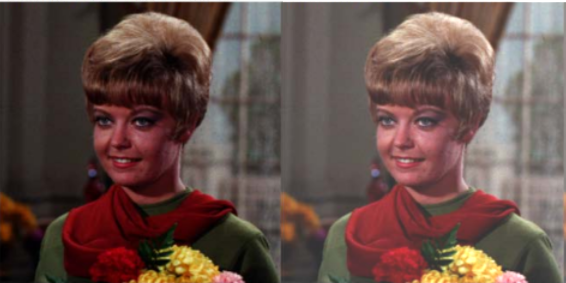

In [5]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff.png')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#TUGAS

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255] : 60
Masukkan kontras [1.0 - 3.0] : 1.5


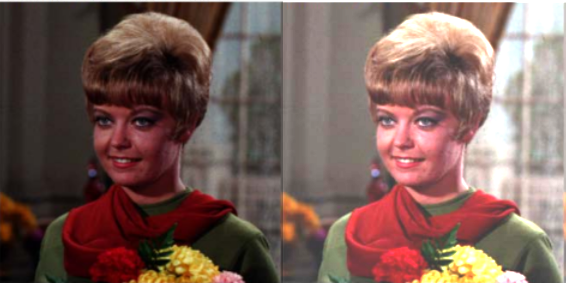

In [6]:
# TUGAS 1
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff.png')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------
Masukkan tingkat kecerahan : 40


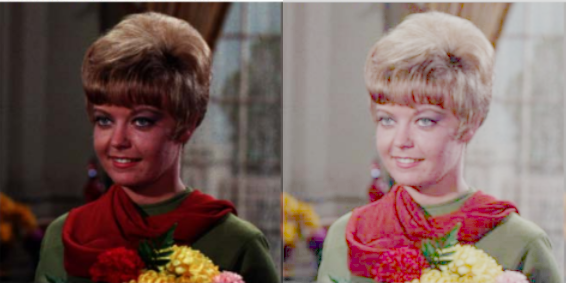

In [7]:
# TUGAS 2
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan : '))
except ValueError:
  print('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

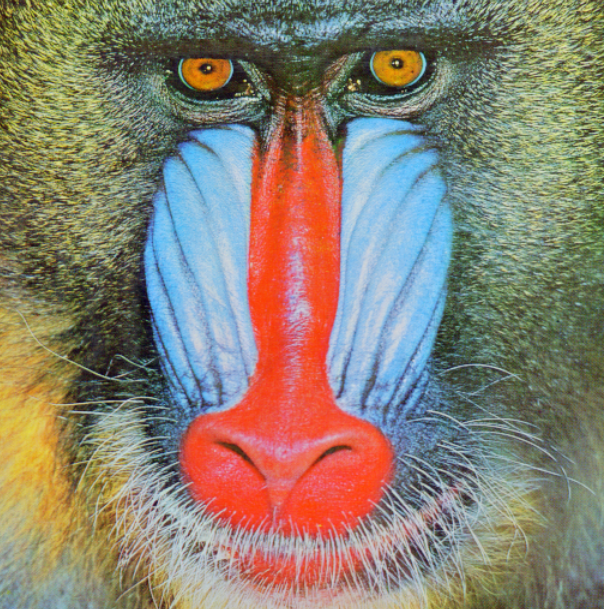

In [9]:
img2 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff.png')
img_rgb = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
cv2_imshow(img2)

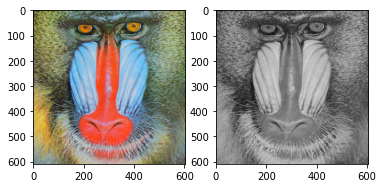

In [10]:
#TUGAS 3(Averaging)
img_avg = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff.png')
img_avg[:] = img2.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

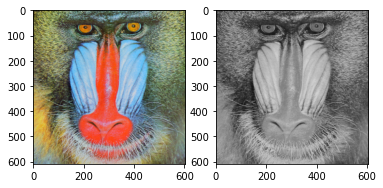

In [11]:
#TUGAS 3(Lightness)
img_lgh = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff.png')
img_lgh[:] = np.max(img_lgh,axis=-1,keepdims=10)/2+np.min(img_lgh,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lgh)

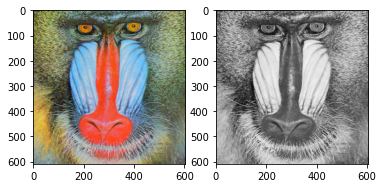

In [12]:
# TUGAS 3(Luminance)
image_lmc = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff.png')
R, G, B = image_lmc[:,:,0], image_lmc[:,:,1], image_lmc[:,:,2]
gray_image_lmc = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lmc, cmap='gray')

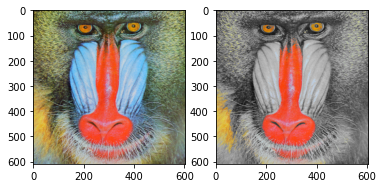

In [13]:
#TUGAS 4
img_4 = img2.copy()

ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(img_rgb, mask3)
gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')